In [12]:
import sympy as sym
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift, dct, idct
from scipy.ndimage import gaussian_filter
import cv2


## Question 1: Application of Differentiation in AI Model Optimization

### Consider a machine learning model where the loss function is given by $L(x, y) = e^{x^2 + y^2} + \cos(xy)$
. Your task is to:

### (a) Find the partial derivatives ∂L\∂x and ∂L\∂y

In [13]:
# Initializing the given function
x, y = sym.symbols('x, y')
L = exp(x**2 + y**2) + cos(x * y)
L

exp(x**2 + y**2) + cos(x*y)

In [14]:
#Find the partial derivatives ∂L/∂x and ∂L/∂y .
dL_dx = sym.diff(L, x)
dL_dy = sym.diff(L, y)
print("differentiation by x:", dL_dx)
print("differentiation by y:", dL_dy)


differentiation by x: 2*x*exp(x**2 + y**2) - y*sin(x*y)
differentiation by y: -x*sin(x*y) + 2*y*exp(x**2 + y**2)


### (b) Write a Python function that computes the gradient vector for a given input (x, y).

In [15]:
#gadient Vector
grad_function = sym.lambdify((x,y),[dL_dx,dL_dy],"numpy")
x_val, y_val = 1.0, 1.0
gradient_at_point = grad_function(x_val, y_val)
print(f"Gradient at ({x_val}, {y_val}): {gradient_at_point}")


Gradient at (1.0, 1.0): [13.936641213053404, 13.936641213053404]


### (c) Use Matplotlib to visualize the loss function as a 3D surface plot over the range x, y ∈ [−2, 2].

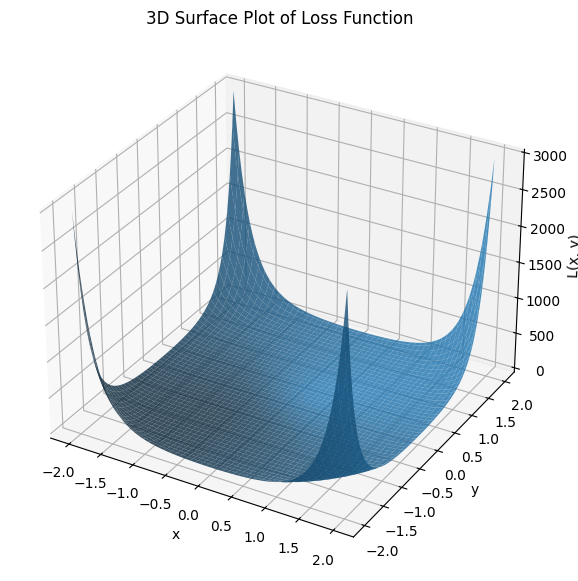

In [16]:

# Define the loss function as a numerical function
loss_function = sym.lambdify((x, y), L, "numpy")

# Create a grid of x and y values
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluate the loss function on the grid
Z = loss_function(X, Y)

# Plot the 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.8)
ax.set_title("3D Surface Plot of Loss Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("L(x, y)")


plt.show()


### (d) Discuss the significance of gradient vectors in model optimization, particularly in gradient descent methods.

#### Significance of Gradient Vectors in Gradient Descent Methods

Gradient vectors are essential in gradient descent optimization techniques, which are widely used for training machine learning models. In the context of gradient descent, the primary objective is to minimize the loss function, and the gradient vector plays a central role in this process by guiding the updates to model parameters.

The gradient vector indicates the direction of the steepest increase in the loss function, while the **negative gradient** points in the direction of the steepest decrease. In gradient descent, this negative gradient is used to update the model parameters iteratively, moving them closer to values that minimize the loss function. The update rule for the parameters is given by:

$$
\theta = \theta - \eta \nabla L(\theta)
$$


where $\theta $ represents the model parameters, $\eta$  is the learning rate, and $\nabla$ $\theta$ is the gradient of the loss function. This update step ensures that the model progressively improves, reducing the loss over time.


One of the key advantages of using gradient vectors is their adaptability to the local landscape of the loss function. In complex, high-dimensional optimization problems, the gradient vector allows the gradient descent algorithm to adjust its steps based on the varying steepness of the function. When the gradient is large, indicating that the model is far from the optimal parameters, the algorithm can take larger steps to converge more quickly. Conversely, when the gradient is small, the algorithm reduces its step size, allowing for finer adjustments as it approaches the minimum.

Moreover, the gradient computation is highly efficient, especially in deep learning, where techniques like backpropagation enable fast and scalable gradient calculation. This efficiency makes it feasible to train complex models on large datasets. The magnitude of the gradient also controls the convergence of the algorithm, as a large gradient indicates that the model is far from the minimum, prompting a larger update, while a small gradient suggests the model is nearing the minimum, encouraging smaller, more precise updates.

In non-convex loss functions, where there may be multiple local minima, gradient descent can help navigate toward better solutions. Although the algorithm can sometimes get stuck in local minima, stochastic gradient descent (SGD) introduces randomness, helping the optimizer escape local minima and explore other regions of the parameter space.

Overall, gradient vectors are fundamental to gradient descent methods, guiding the optimization process by indicating the direction and rate of change of the loss function. This enables machine learning models to efficiently minimize their loss function and learn from data.



## Question 2: Integration for Signal Processing
### The amplitude of a signal A(t) can be modeled by the function $A(t) = 2t^2 e^{-t}$ on the interval 𝑡∈[0,4]




### (a) Use the Python library SymPy to compute the definite integral of   $2t^2 e^{-t}$ over the interval  ∈[0,4]


In [17]:
t = sym.symbols('t')
A_t = 2 * t**2 * sym.exp(-t)
A_t

2*t**2*exp(-t)

In [18]:
integral = sym.integrate(A_t, (t, 0, 4))
integral

4 - 52*exp(-4)

### (b) Plot the function A(t) using Matplotlib and annotate the graph with the area under the curve corresponding to the integral.

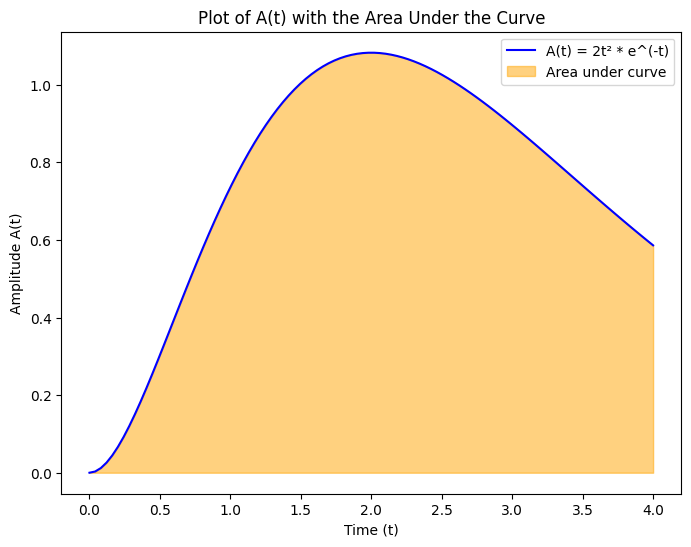

In [19]:


# Define the function A(t)
def A(t):
    return 2 * t**2 * np.exp(-t)  # Use NumPy's exp function

# Generate values for t in the range [0, 4]
t_val = np.linspace(0, 4, 100)
a_val = A(t_val)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(t_val, a_val, color='blue', label='A(t) = 2t² * e^(-t)')
plt.fill_between(t_val, a_val, where=(t_val >= 0) & (t_val <= 4), color='orange', alpha=0.5, label='Area under curve')

# Add labels and title
plt.title("Plot of A(t) with the Area Under the Curve")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude A(t)")
plt.legend()

# Show the plot
plt.show()


#### (c) Interpret the meaning of the computed integral in the context of signal energy.

The definite integral 
$R = \int 2t^2 e^{-t}$ , dt\ dt represents the total energy of the signal 
𝐴(𝑡) over the time intervalt∈[0,4].

In signal processing, the energy E of a signal is given by the integral of its amplitude squared over time. In this case, the integral represents the accumulated "energy" of the signal over the interval from 0 to 4.

The value of the integral gives the total amount of energy that is "contained" in the signal from time t=0 to t=4. This could be useful for understanding how much power is present in the signal during that time period.

The graph visually represents this area under the curve, which corresponds to the integral, showing how the signal's amplitude behaves over time. The area under the curve reflects the signal's contribution to its total energy over the specified range.

##  Question 3: Series Convergence and Numerical Approximation

The function  $f(x) = \ln(1 + x)$ can be approximated by the series:

$f(x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \dots$


In [20]:
def series_ln1p(x, terms=10):
    """
    Approximate ln(1 + x) using the series expansion up to the given number of terms.

    Parameters:
    - x: The input value (can be an array).
    - terms: Number of terms in the series.

    Returns:
    - Approximation of ln(1 + x).
    """
    approximation = np.zeros_like(x, dtype=np.float64)
    for n in range(1, terms + 1):
        approximation += (-1)**(n + 1) * (x**n) / n
    return approximation

### (a) Implement a Python script that uses the first 10 terms of this series to approximate  $\ln(1 + x)$  for x $\in$ [-1, 1]



In [21]:
x_values = np.linspace(-1, 1, 500)
series_approx = series_ln1p(x_values, terms=10)
actual_ln1p = np.log1p(x_values)
actual_ln1p


C:\Users\aashi\AppData\Local\Temp\ipykernel_36908\3862398878.py:3: RuntimeWarning: divide by zero encountered in log1p
  actual_ln1p = np.log1p(x_values)


array([           -inf, -5.51945892e+00, -4.82631173e+00, -4.42084663e+00,
       -4.13316455e+00, -3.91002100e+00, -3.72769945e+00, -3.57354877e+00,
       -3.44001737e+00, -3.32223434e+00, -3.21687382e+00, -3.12156364e+00,
       -3.03455227e+00, -2.95450956e+00, -2.88040159e+00, -2.81140871e+00,
       -2.74687019e+00, -2.68624557e+00, -2.62908716e+00, -2.57501994e+00,
       -2.52372664e+00, -2.47493648e+00, -2.42841646e+00, -2.38396470e+00,
       -2.34140508e+00, -2.30058309e+00, -2.26136238e+00, -2.22362205e+00,
       -2.18725441e+00, -2.15216309e+00, -2.11826153e+00, -2.08547171e+00,
       -2.05372301e+00, -2.02295135e+00, -1.99309839e+00, -1.96411085e+00,
       -1.93593998e+00, -1.90854100e+00, -1.88187276e+00, -1.85589727e+00,
       -1.83057946e+00, -1.80588685e+00, -1.78178930e+00, -1.75825880e+00,
       -1.73526928e+00, -1.71279643e+00, -1.69081752e+00, -1.66931131e+00,
       -1.64825790e+00, -1.62763862e+00, -1.60743591e+00, -1.58763328e+00,
       -1.56821520e+00, -

### (b) Plot the approximation and the actual function $\ln(1 + x)$  on the same graph for comparison.

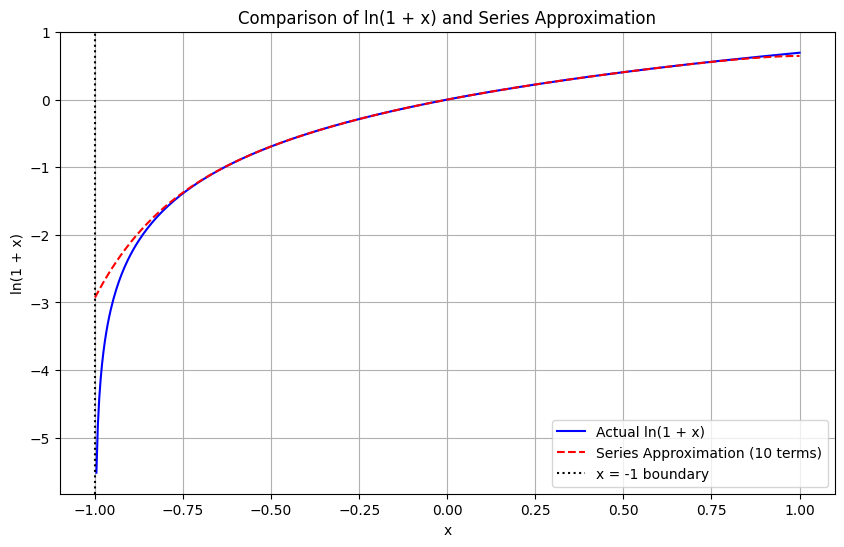

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, actual_ln1p, label="Actual ln(1 + x)", color="blue")
plt.plot(x_values, series_approx, label="Series Approximation (10 terms)", color="red", linestyle="--")
plt.axvline(x=-1, color="black", linestyle=":", label="x = -1 boundary")
plt.xlabel("x")
plt.ylabel("ln(1 + x)")
plt.title("Comparison of ln(1 + x) and Series Approximation")
plt.legend()
plt.grid()
plt.show()


### (c) Analyze the convergence behavior of the series, particularly focusing on the error for larger values of x .

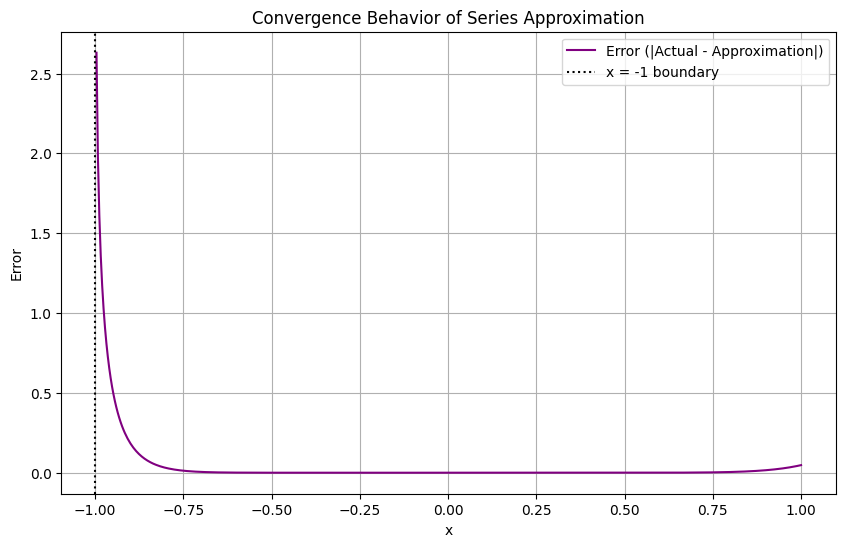

In [23]:
errors = np.abs(series_approx - actual_ln1p)
plt.figure(figsize=(10, 6))
plt.plot(x_values, errors, label="Error (|Actual - Approximation|)", color="purple")
plt.axvline(x=-1, color="black", linestyle=":", label="x = -1 boundary")
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Convergence Behavior of Series Approximation")
plt.legend()
plt.grid()
plt.show()

In [24]:
print("Error Analysis for specific x values:")
for x in [-0.9, -0.5, 0, 0.5, 0.9]:
    approx = series_ln1p(np.array([x]), terms=10)[0]
    actual = np.log1p(x)
    error = abs(approx - actual)
    print(f"x = {x:.1f}, Approximation = {approx:.6f}, Actual = {actual:.6f}, Error = {error:.6e}")


Error Analysis for specific x values:
x = -0.9, Approximation = -2.118748, Actual = -2.302585, Error = 1.838375e-01
x = -0.5, Approximation = -0.693065, Actual = -0.693147, Error = 8.232441e-05
x = 0.0, Approximation = 0.000000, Actual = 0.000000, Error = 0.000000e+00
x = 0.5, Approximation = 0.405435, Actual = 0.405465, Error = 3.046029e-05
x = 0.9, Approximation = 0.626198, Actual = 0.641854, Error = 1.565578e-02


# Question 4: Fourier Transform for Data Filtering

A noisy signal $s(t) = \sin(2\pi t) + 0.5 \sin(10\pi t) + 0.3 \sin(50\pi t)$ is sampled over the interval  $t \in [0, 1]$ with 500 sample points.


### (a)  Perform a Fourier Transform on this signal using NumPy and plot the frequency spectrum.

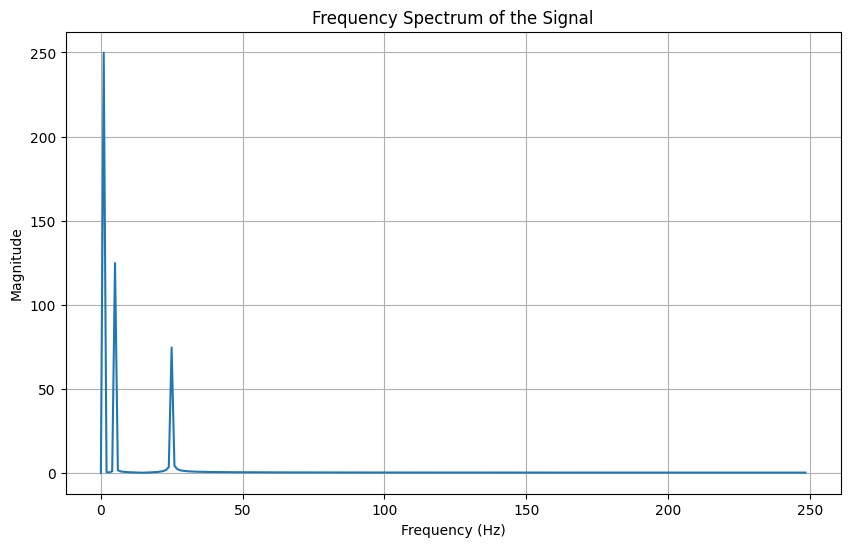

In [25]:
t = np.linspace(0, 1, 500)  # 500 sample points over the interval [0, 1]

# Signal generation
s = np.sin(2 * np.pi * t) + 0.5 * np.sin(10 * np.pi * t) + 0.3 * np.sin(50 * np.pi * t)

# Fourier Transform using NumPy
S_f = np.fft.fft(s)
frequencies = np.fft.fftfreq(len(t), t[1] - t[0])

# Only keep the positive frequencies for plotting
positive_frequencies = frequencies[:len(frequencies)//2]
positive_S_f = np.abs(S_f[:len(frequencies)//2])

# Plotting the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_S_f)
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

### (b) Design and apply a low-pass filter to remove frequencies above 20 Hz, then plot the filtered signal.

C:\Users\aashi\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\aashi\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


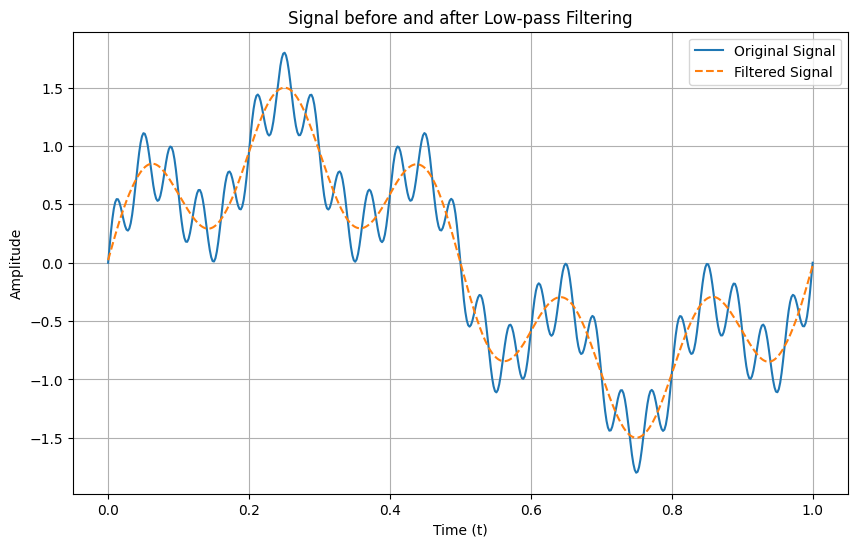

In [26]:
# Cutoff frequency (20 Hz)
cutoff_frequency = 20

# Apply low-pass filter: Zero out frequencies above 20 Hz
filtered_S_f = S_f.copy()
filtered_S_f[np.abs(frequencies) > cutoff_frequency] = 0

# Inverse Fourier Transform to get the filtered signal
filtered_signal = np.fft.ifft(filtered_S_f)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, s, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', linestyle='--')
plt.title("Signal before and after Low-pass Filtering")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


### (c) Discuss how filtering impacts the signal and its applications in real-world data science scenarios, such as noise reduction in audio processing.

### Impact on Signal

- **Noise Removal**: The low-pass filter effectively removes high-frequency noise that can distort the signal. In the case of this signal, the high-frequency component (`0.3 sin(50πt)`) is removed, leaving a cleaner signal that approximates the lower-frequency components.

- **Smoothness**: After filtering, the signal becomes smoother because high-frequency oscillations are suppressed. This is particularly useful for signals where high-frequency fluctuations are not meaningful (e.g., in audio or sensor data).

### Real-world Applications

- **Audio Processing**: In real-world audio processing, filters are used to remove noise such as electrical hum, high-frequency hiss, or background interference. A low-pass filter can clean up audio recordings, enhancing clarity for speech or music.

- **Sensor Data**: In sensor data processing (e.g., temperature or pressure sensors), high-frequency noise caused by environmental factors or hardware imperfections can be filtered out to reveal the true underlying trends.

- **Image Processing**: Similar principles are applied in image processing to remove high-frequency noise (e.g., speckles, grain) while preserving important image features.

### Conclusion

In conclusion, filtering techniques like low-pass filters are widely used in data science and signal processing for noise reduction, smoothing, and enhancing the quality of data before analysis or decision-making.



## Question 5: Image Processing Using Fourier and Discrete Cosine Transforms

### Consider the image provided in the coursework description on Moodle. Your task is to perform the following operations using Python:


### (a) Edge Detection Using 2D Fourier TransformFind the edges in the image using a 2D Fourier Transform.Visualize the resulting image with detected edges.

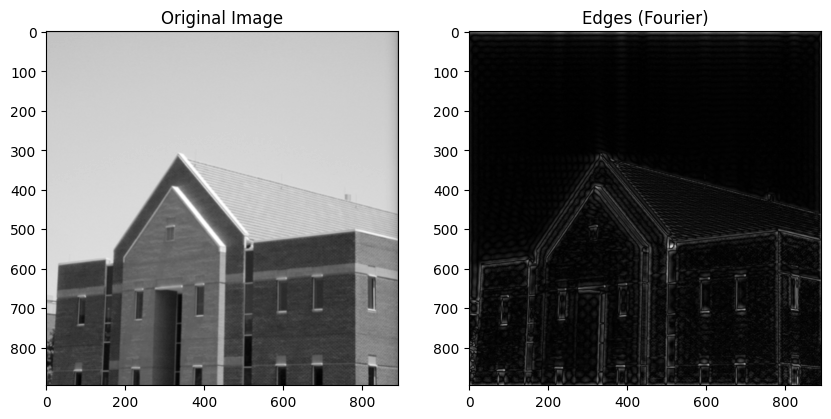

In [ ]:
# Load the image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Apply 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

# High-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), dtype=np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0
f_shift_filtered = f_shift * mask

# Inverse Fourier Transform
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_edges = np.abs(np.fft.ifft2(f_ishift))

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image_edges, cmap='gray'), plt.title('Edges (Fourier)')
plt.show()


### (b) Gaussian Blur Using 2D Fourier TransformApply a Gaussian blur to the original image using a 2D Fourier Transform.Compare it to a standard Gaussian blur.

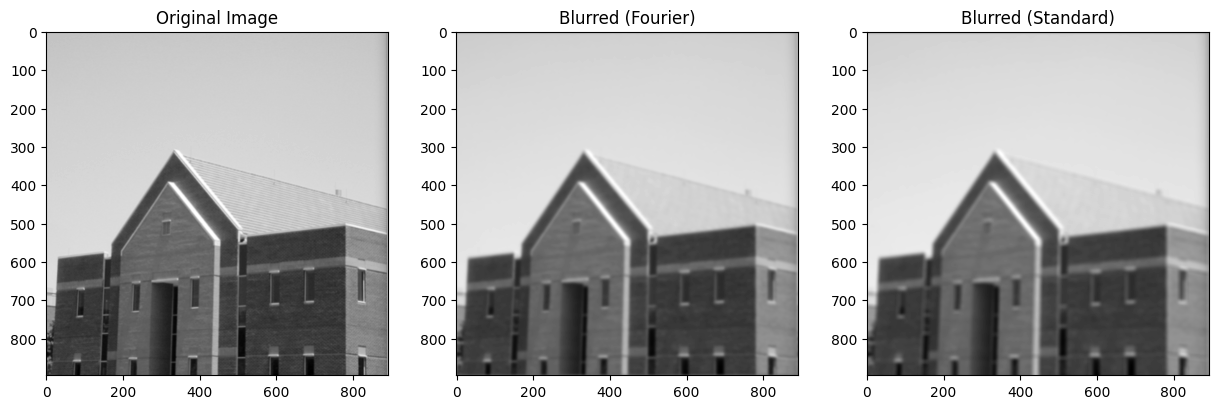

In [28]:
# Create Gaussian kernel in frequency domain
x, y = np.meshgrid(np.linspace(-0.5, 0.5, cols), np.linspace(-0.5, 0.5, rows))
d = np.sqrt(x**2 + y**2)
sigma = 0.05
gaussian_kernel = np.exp(-(d**2) / (2 * sigma**2))

# Apply Gaussian kernel in frequency domain
f_shift_blurred = f_shift * gaussian_kernel
f_ishift_blurred = np.fft.ifftshift(f_shift_blurred)
image_blurred_fft = np.abs(np.fft.ifft2(f_ishift_blurred))

# Standard Gaussian blur using OpenCV
image_blurred_std = cv2.GaussianBlur(image, (15, 15), sigmaX=5)

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(image_blurred_fft, cmap='gray'), plt.title('Blurred (Fourier)')
plt.subplot(133), plt.imshow(image_blurred_std, cmap='gray'), plt.title('Blurred (Standard)')
plt.show()


### (c) Discrete Cosine Transform (DCT) and ScalingApply a Discrete Cosine Transform (DCT) to the original image.Scale the image down to 240px × 240px using the DCT.Display the scaled image and compare it to the original.

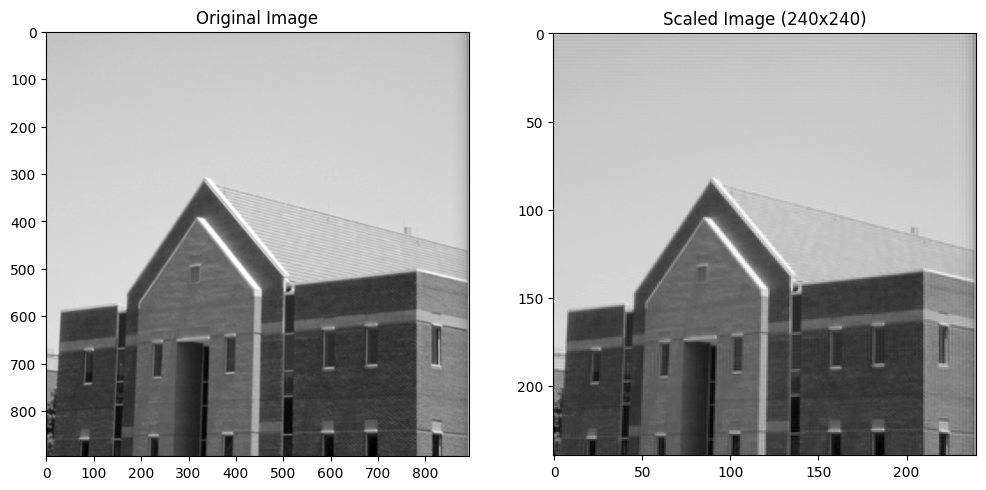

In [32]:
image_dct = dct(dct(image.T, norm='ortho').T, norm='ortho')

# Zero out high-frequency components for scaling
rows, cols = image_dct.shape
scaled_dct = image_dct[:240, :240]

# Perform inverse DCT to reconstruct the scaled image
scaled_image = idct(idct(scaled_dct.T, norm='ortho').T, norm='ortho')

# Plot the original and scaled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Scaled Image (240x240)")
plt.imshow(scaled_image, cmap='gray')
plt.show()

### (d) Reproducing and Explaining Artifacts in DCT CompressionReproduce and explain the common artifacts (ringing and blocking) that occur when an image is compressed using DCT.Provide visual examples of these artifacts.

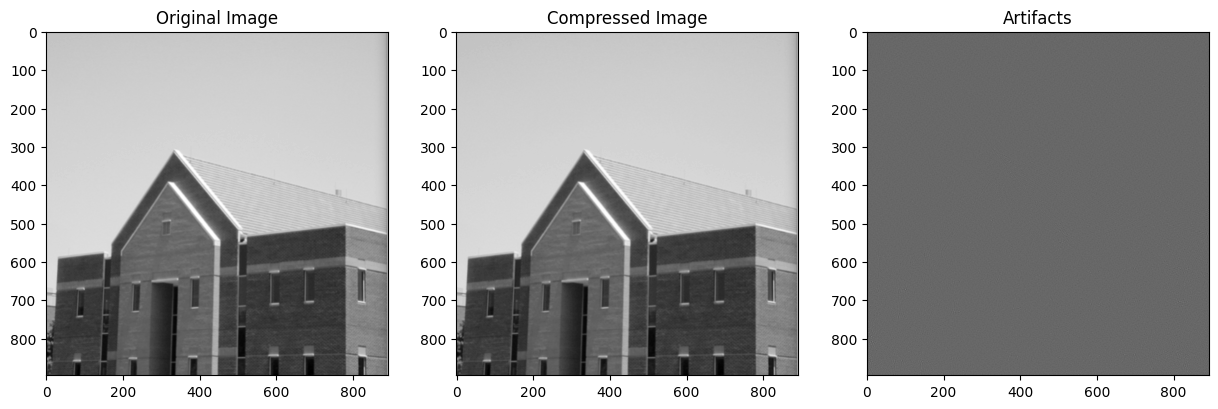

In [30]:
# Retain fewer DCT coefficients (simulate compression)
compression_factor = 0.1
dct_compressed = np.copy(dct_image)
threshold = np.percentile(np.abs(dct_compressed), (1 - compression_factor) * 100)
dct_compressed[np.abs(dct_compressed) < threshold] = 0

# Reconstruct compressed image
image_compressed = idct(idct(dct_compressed.T, norm='ortho').T, norm='ortho')

# Visualize artifacts
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(image_compressed, cmap='gray'), plt.title('Compressed Image')
plt.subplot(133), plt.imshow(image - image_compressed, cmap='gray'), plt.title('Artifacts')
plt.show()
